In [127]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.pyplot import *
# from sklearn.neural_network import MLPClassifier as sk
import time

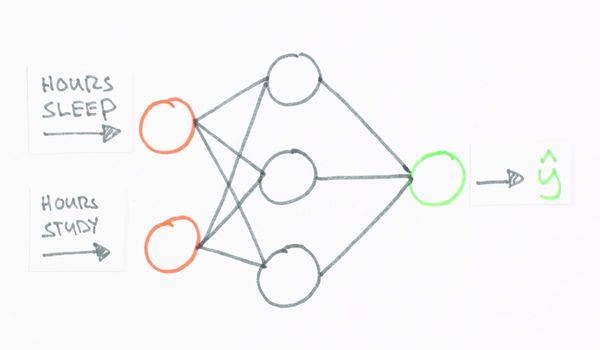

In [128]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)
X

array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  2.]])

In [129]:
X = X/np.amax(X, axis=0)  # ???????
y = y/100 # Max test score is 100
X


array([[0.3, 1. ],
       [0.5, 0.2],
       [1. , 0.4]])

In [130]:
y

array([[0.75],
       [0.82],
       [0.93]])

In [131]:
class Neural_Network(object):
    def __init__(self):        
        # Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        # Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        # Derivative of s=Sigmoid function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        # Compute derivative with respect to W1 and W2
        self.yHat = self.forward(X)

        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)

        return dJdW1, dJdW2
    
    # Helper function for interacting with other methods/classes
    
    def getParams(self):
        # Get W1 and W2 Rolled into vector
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        # Set W1 and W2 using single parameter vector
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize, self.hiddenLayerSize))

        W2_end = W1_end + self.hiddenLayerSize * self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))

    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

        

In [132]:
NN = Neural_Network()
NN.W1

array([[ 0.40739818,  0.25046712, -0.80203336],
       [ 0.35095113,  0.43757932,  0.6475777 ]])

In [133]:
NN.W2

array([[-1.14443393],
       [-2.02486377],
       [ 0.0523969 ]])

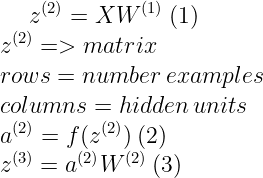

In [134]:
yHat = NN.forward(X)
yHat

array([[0.12563622],
       [0.14840655],
       [0.12669357]])

In [135]:
y

array([[0.75],
       [0.82],
       [0.93]])

Some examples for sigmoid():

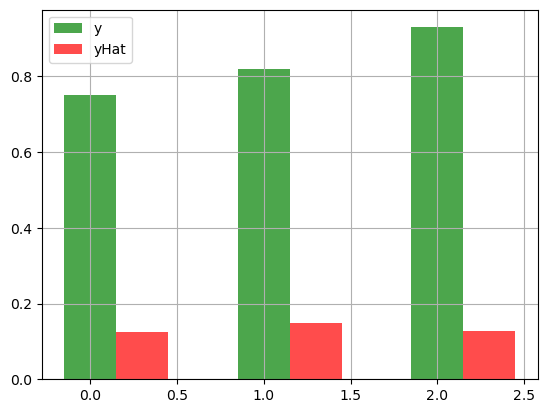

In [136]:
#Compare estimate, yHat, to actually score
plt.bar([0,1,2], y.flatten(), width = 0.3, color='g',alpha=0.7)
plt.bar([0.3,1.3,2.3], yHat.flatten(), width = 0.3, color='r', alpha=0.7)
plt.grid(1)
plt.legend(['y', 'yHat'])

In [137]:
NN.sigmoid(1)

0.7310585786300049

In [138]:
NN.sigmoid(np.array([-1,0,1]))

array([0.26894142, 0.5       , 0.73105858])

In [139]:
NN.sigmoid(np.random.randn(3,3))

array([[0.34606761, 0.446159  , 0.65815166],
       [0.65984059, 0.86053481, 0.14152531],
       [0.37956038, 0.46258593, 0.4434718 ]])

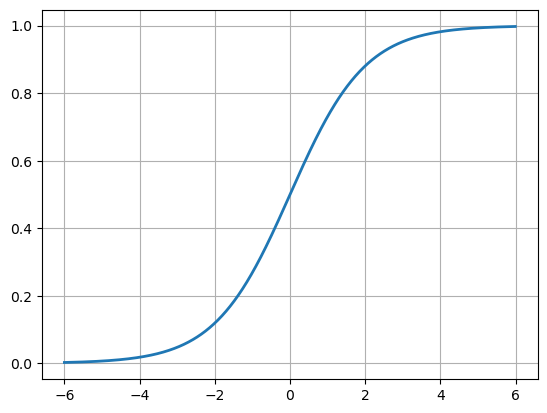

In [140]:
testInput = np.arange(-6,6,0.01)
plt.plot(testInput, NN.sigmoid(testInput), linewidth=2)
plt.grid(1)

In [141]:
yHat = NN.forward(X)
yHat

array([[0.12563622],
       [0.14840655],
       [0.12669357]])

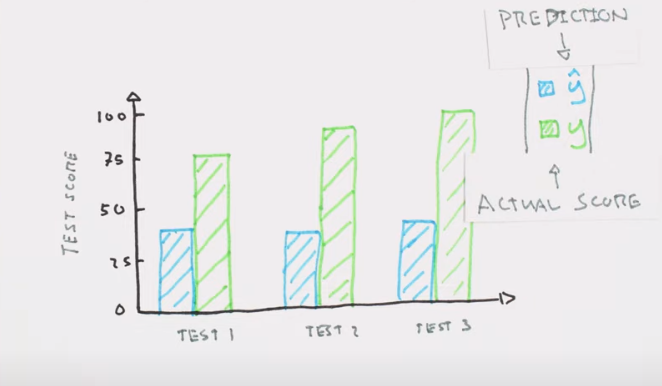

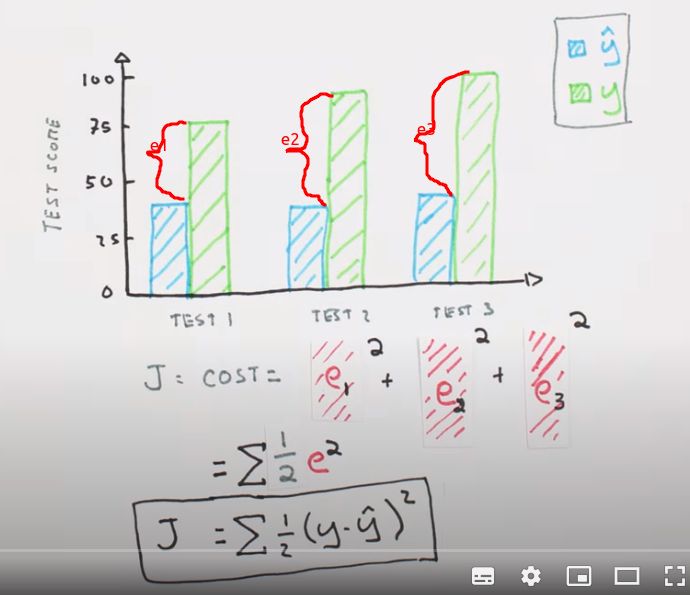

J => The smaller - the better

Training a Network = Minimizing a Cost Function

We can not manage data (inputs, X) but we can manage weights (W)

We have 9 different weights. And it is difficult to **recognize** them all in one time.

Let's imagine that we have only one W (weight)

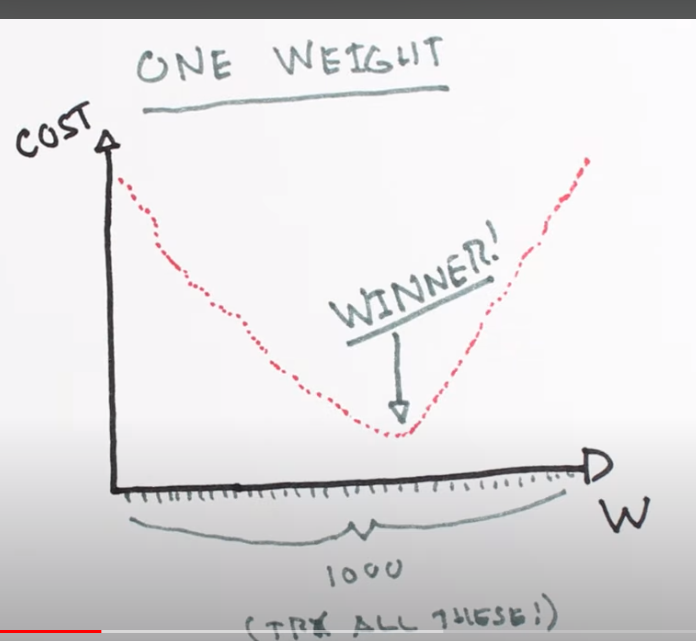

In [142]:


weightsToTry = np.linspace(-10,10,1000)
costs = np.zeros(1000)

startTime = time.perf_counter()
for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    yHat = NN.forward(X)
    costs[i] = 0.5*np.sum((y-yHat)**2)

endTime = time.perf_counter()

In [143]:
timeElapsed = endTime - startTime
timeElapsed

0.05246719199931249

### Cost

Text(0.5, 0, 'Weight')

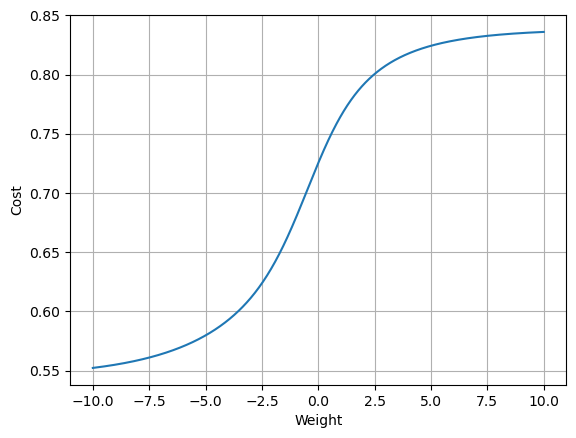

In [144]:
plt.plot(weightsToTry, costs)
plt.grid(1)
plt.ylabel("Cost")
plt.xlabel("Weight")


0.04 sec - winner found.

But 2 weights?

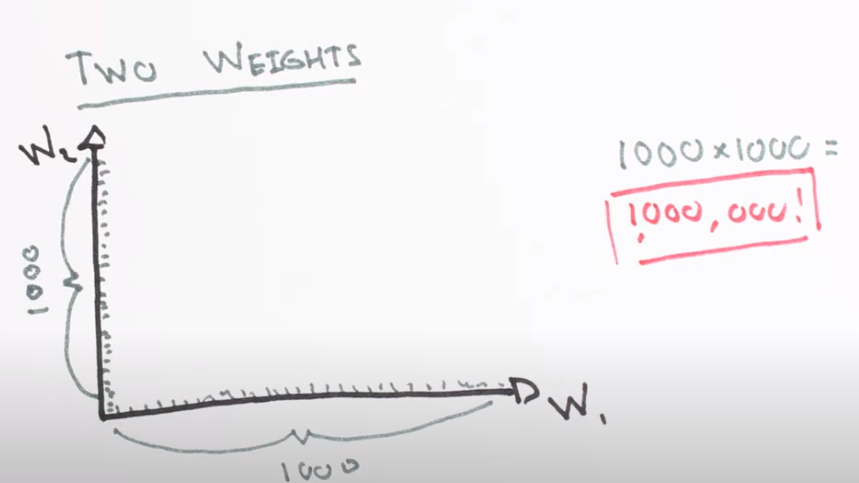

In [145]:
## from videoSupport import *


weightsToTry = np.linspace(-10,10,1000)
costs = np.zeros((1000, 1000))

startTime = time.perf_counter()
for i in range(1000):
    for j in range(1000):
        NN.W1[0,0] = weightsToTry[i]
        NN.W1[0,1] = weightsToTry[j]
        yHat = NN.forward(X)
        costs[i] = 0.5 * np.sum((y - yHat) ** 2)

endTime = time.perf_counter()

In [146]:
timeElapsed = endTime - startTime
timeElapsed

31.576882872999704

Text(0.5, 0, 'Weight')

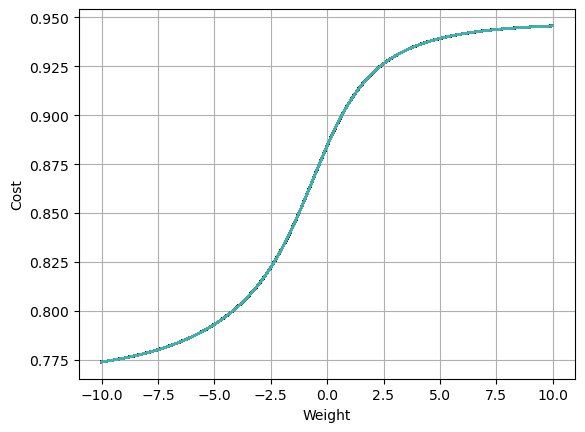

In [147]:
plt.plot(weightsToTry, costs)
plt.grid(1)
plt.ylabel("Cost")
plt.xlabel("Weight")

In [148]:
.04*(1000**(4-1))/(3600*24*365)

1.2683916793505834

In [149]:
NN = Neural_Network()


In [150]:
yHat = NN.forward(X)

In [151]:
yHat

array([[0.30095048],
       [0.21919934],
       [0.20747597]])

In [152]:
y

array([[0.75],
       [0.82],
       [0.93]])

In [153]:
NN.W1[0,0] = 1.1
yHat = NN.forward(X)


In [154]:
np.sum(0.5*(y-yHat)**2)

0.5489245381655183

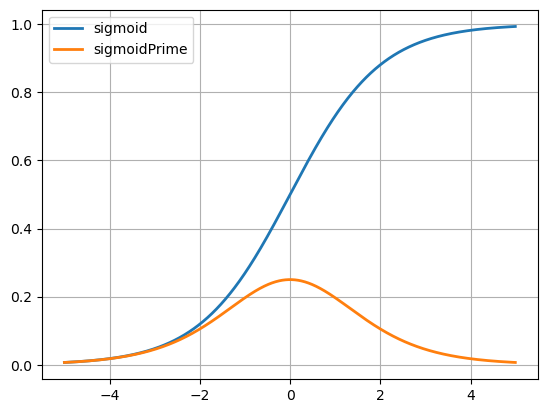

In [155]:
testValues = np.arange(-5,5,0.01)
plt.plot(testValues, NN.sigmoid(testValues), linewidth=2)
plt.plot(testValues, NN.sigmoidPrime(testValues), linewidth=2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoidPrime'])

In [156]:
cost1 = NN.costFunction(X,y)

In [157]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [158]:
dJdW1

array([[0.00655371, 0.02249404, 0.07919329],
       [0.00542622, 0.01793873, 0.06262664]])

In [159]:
dJdW2

array([[-0.23712886],
       [-0.10975029],
       [-0.16020655]])

In [160]:
scalar = 3
NN.W1 = NN.W1 + scalar * dJdW1
NN.W2 = NN.W2 + scalar * dJdW2
cost2 = NN.costFunction(X,y)


In [161]:
print(cost1, cost2)

[0.54892454] [0.81529213]


In [162]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar * dJdW1
NN.W2 = NN.W2 - scalar * dJdW2
cost3 = NN.costFunction(X,y)

In [163]:
print(cost1, cost3)

[0.54892454] [0.65331915]


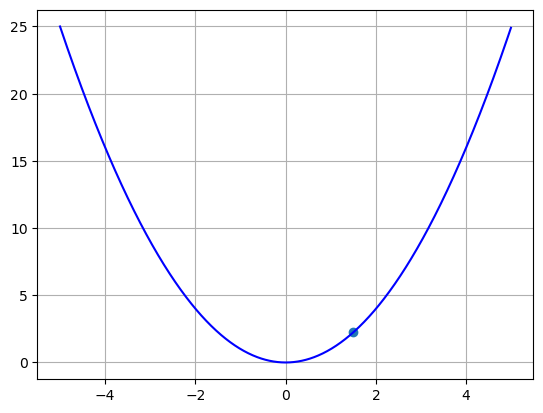

In [164]:
x = np.arange(-5, 5, 0.01)

plt.plot(x, x**2, 'b')
plt.grid(1)
plt.scatter(1.5, 1.5**2)
# plt.xticks(range(1, 5))

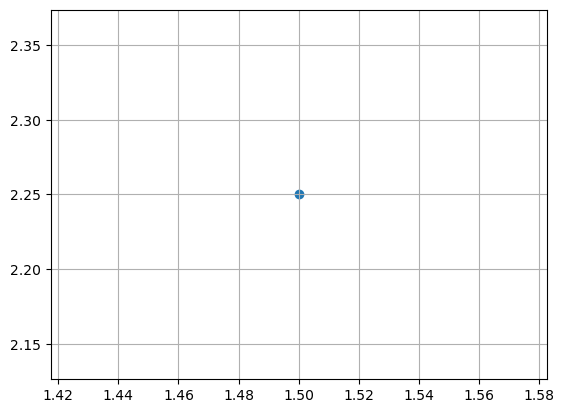

In [165]:
x = np.arange(1.5, 1.505, 0.01)

plt.plot(x, x**2, 'g')
plt.grid(1)
plt.scatter(1.5, 1.5**2)
# plt.xticks(range(1, 5))

In [166]:
def f(x):
    return x**2

epsilon = 1e-4
epsilon2 = 1*10**(-4)

x =1.5

In [167]:
numericGradient = (f(x+epsilon)-f(x-epsilon))/(2*epsilon)

numericGradient, 2*x

(2.9999999999996696, 3.0)

In [168]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        # Set perturbation vector
        perturb[p] = e

        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)

        N.setParams(paramsInitial -perturb)
        loss1 = N.costFunction(X, y)

        # Compute numerical gradient
        numgrad[p] = (loss2 - loss1) / (2 * e)

        # Return the changed value back to zero
        perturb[p] = 0
    
    # Return Params to original value^
    N.setParams(paramsInitial)

    return numgrad

In [169]:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X, y)


In [170]:
numgrad

array([ 0.01406978,  0.0240262 ,  0.07437514,  0.01244486,  0.02041387,
        0.06358816, -0.20972954, -0.09757204, -0.14432861])

In [171]:
grad

array([ 0.01406978,  0.0240262 ,  0.07437514,  0.01244486,  0.02041387,
        0.06358816, -0.20972954, -0.09757204, -0.14432861])

In [173]:
np.linalg.norm(grad - numgrad) / np.linalg.norm(grad + numgrad)

1.3141248033478305e-10